In [62]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

1. Consideremos la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1.

(a) 
Sean 𝑋 ∼ U (0, 1) y 𝑌 = 𝑓 (𝑋). Fijemos 𝑛 = 100. 
Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y aplicar la función 𝑓 a cada muestra para calcular 𝑦𝑖 = 𝑓 (𝑥𝑖), con 1 ≤ 𝑖 ≤ 𝑛. 
Realizar un ajuste lineal de la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples (𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados y calcular, para cada 𝑖 ∈ {1, . . . , 𝑛}, 
𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).
Describir la distribución empírica dada por {𝜀1, . . . , 𝜀𝑛}.

In [3]:
def f(x: int) -> int:
    return 2*x - 1

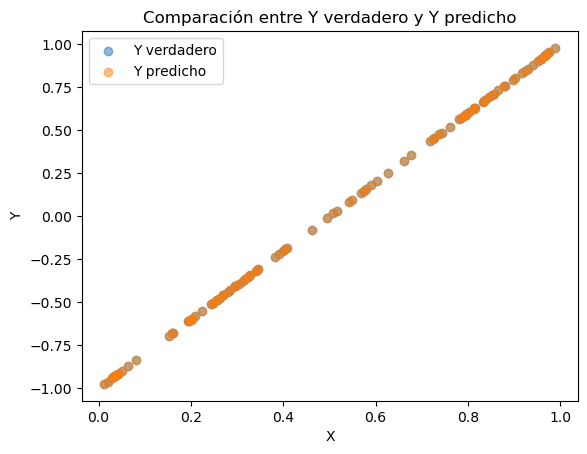

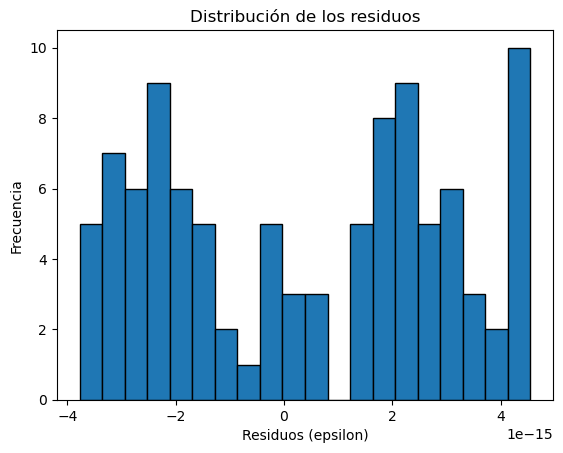

In [175]:
n = 100

X = np.random.uniform(0,1,n)
Y = f(X)

model = np.vstack([X, np.ones(n)]).T
beta_1, beta_0 = np.linalg.inv(model.T @ model) @ model.T @ Y

Y_pred = beta_1 * X + beta_0

epsilon = Y - Y_pred

#grafico
plt.scatter(X, Y, label='Y verdadero', alpha = 0.5)
plt.scatter(X, Y_pred, label='Y predicho', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación entre Y verdadero y Y predicho')
plt.show()

# Gráfico de la distribución de los residuos
plt.hist(epsilon, bins=20, edgecolor='black')
plt.xlabel('Residuos (epsilon)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los residuos')
plt.show()

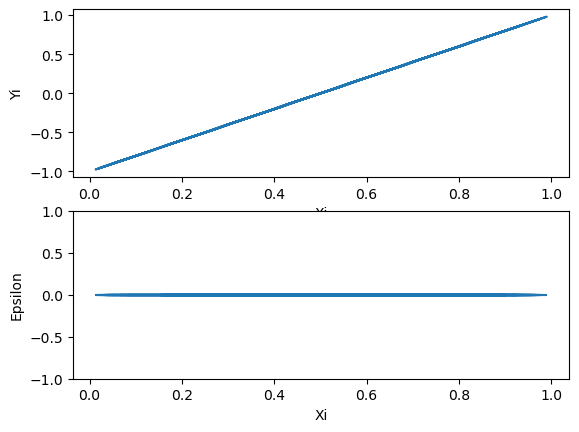

In [176]:
fig, ax = plt.subplots(2)

ax[0].plot(X, Y)
ax[0].set_xlabel("Xi")
ax[0].set_ylabel("Yi")

m, b = np.polyfit(X, Y, 1)
epsilon = Y - (m*X +b)

ax[1].plot(X, epsilon)
ax[1].set_ylim(-1,1)
ax[1].set_xlabel("Xi")
ax[1].set_ylabel("Epsilon")

plt.show()

# No hay ruido, la estimacion es perfecta y todos los epsilon son exactamente 0.

b) Sean 𝑋 ∼ U (0, 1), 𝑍 ∼ N (0, .25) y 𝑌 = 𝑓 (𝑋) + 𝑍. Fijemos 𝑛 = 100. Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y 𝑧1, . . . , 𝑧𝑛 de 𝑍 y calcular 𝑦𝑖 = 𝑓 (𝑥𝑖) + 𝑧𝑖 , con 1 ≤ 𝑖 ≤ 𝑛. realizar un ajuste lineal de la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples (𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados y calcular, para cada 𝑖 ∈ {1, . . . , 𝑛}, 
𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).
Describir la distribución empírica dada por {𝜀1, . . . , 𝜀𝑛} haciendo un histograma.

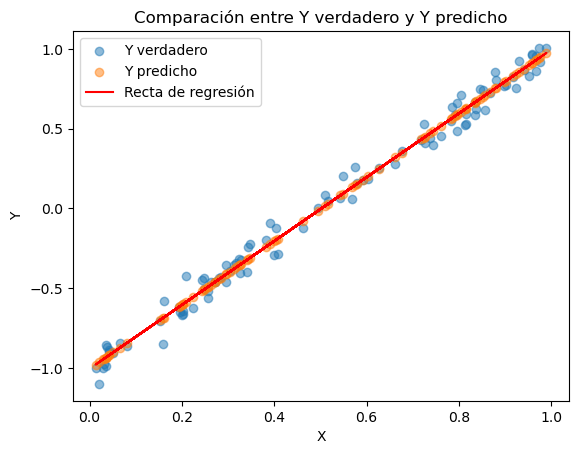

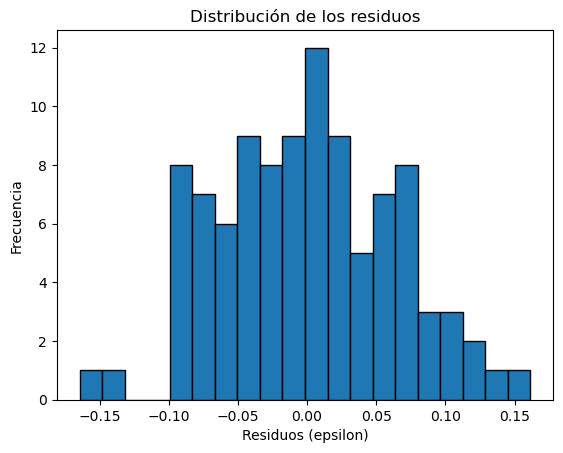

In [177]:
Z = np.random.normal(0,0.25**2,n)
Y = f(X) + Z

model = np.vstack([X, np.ones(len(X))]).T
beta_1, beta_0 = np.linalg.inv(model.T @ model) @ model.T @ Y

Y_pred = beta_1 * X + beta_0

epsilon = Y - Y_pred

#grafico
plt.scatter(X, Y, label='Y verdadero', alpha = 0.5)
plt.scatter(X, Y_pred, label='Y predicho', alpha = 0.5)
plt.plot(X, beta_1 * X + beta_0, color='red', label='Recta de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación entre Y verdadero y Y predicho')
plt.show()

# Gráfico de la distribución de los residuos
plt.hist(epsilon, bins=20, edgecolor='black')
plt.xlabel('Residuos (epsilon)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los residuos')
plt.show()

c) Repetir el paso anterior desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar y estimar la media y la varianza de 𝜀 en función de 𝑛.

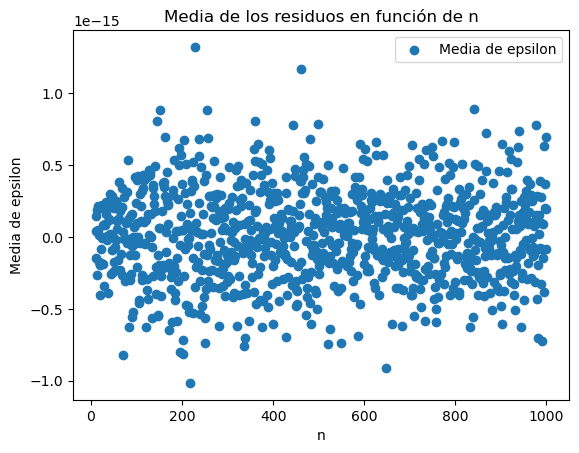

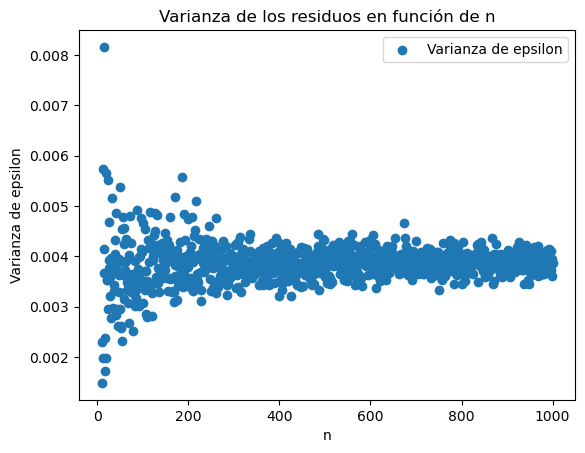

In [178]:
mean_values = []
variance_values = []

for n in range(10,1001):
    X = np.random.uniform(0,1,n)
    Z = np.random.normal(0,0.25**2,n)
    Y = f(X) + Z

    model = np.vstack([X, np.ones(n)]).T
    beta_1, beta_0 = np.linalg.inv(model.T @ model) @ model.T @ Y

    Y_pred = beta_1 * X + beta_0

    epsilon = Y - Y_pred

    mean_values.append(epsilon.mean())
    variance_values.append(epsilon.var())

plt.scatter(range(10,1001), mean_values, label='Media de epsilon')
plt.xlabel('n')
plt.ylabel('Media de epsilon')
plt.title('Media de los residuos en función de n')
plt.legend()
plt.show()

# Graficar la varianza de los residuos en función de n
plt.scatter(range(10,1001), variance_values, label='Varianza de epsilon')
plt.xlabel('n')
plt.ylabel('Varianza de epsilon')
plt.title('Varianza de los residuos en función de n')
plt.legend()
plt.show()    

2. Consideremos la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1. Sean 𝑋 ∼ U (0, 1), 𝑍 ∼ N (0, .25)
y 𝑌 = 𝑓 (𝑋) + 𝑍.

(a) Fijemos 𝑛 = 100. Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y 𝑧1, . . . , 𝑧𝑛 de 𝑍 y calcular 𝑦𝑖 = 𝑓 (𝑥𝑖) + 𝑧𝑖
,
con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples
(𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados.


In [179]:
n = 100
def sampleado(n):
    X = np.random.uniform(0,1,n)
    Z = np.random.normal(0,0.25**2,n)
    Y = f(X) + Z

    model = np.vstack([X, np.ones(len(X))]).T
    beta_1, beta_0 = np.linalg.inv(model.T @ model) @ model.T @ Y

    Y_pred = beta_1 * X + beta_0

    epsilon = Y - Y_pred
    return beta_0, beta_1

(b) Repetir el paso anterior 𝑚 = 30 veces para obtener 𝑚 pares de coeficientes 𝛽0 y 𝛽1, es decir, 𝑚
samples de 𝛽0 y 𝑚 samples de 𝛽1. Visualizar la distribución de cada 𝛽 haciendo un histograma.

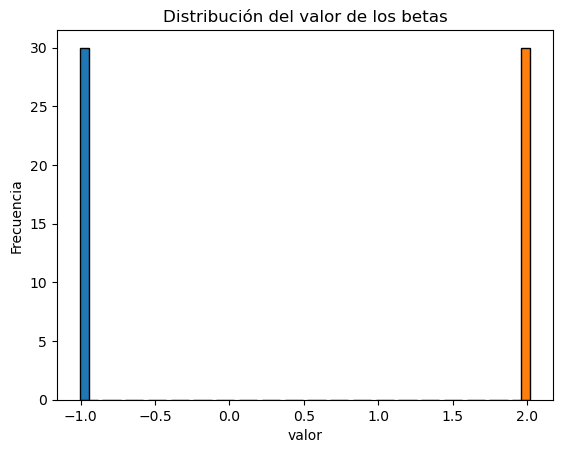

In [180]:
beta0 = []
beta1 = []

for i in range(30):
    beta_0, beta_1 = sampleado(100)
    beta0.append(beta_0)
    beta1.append(beta_1)

plt.hist([beta0,beta1], bins=20, edgecolor='black')
plt.xlabel('valor')
plt.ylabel('Frecuencia')
plt.title('Distribución del valor de los betas')
plt.show()

(c) Repetir el paso anterior desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar la media y la varianza de cada
coeficiente 𝛽 en función de 𝑛.

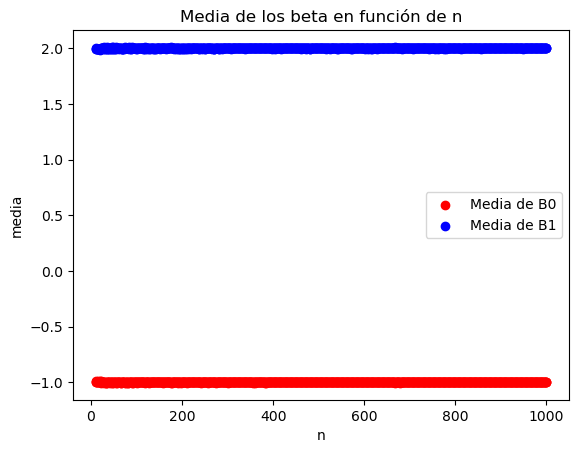

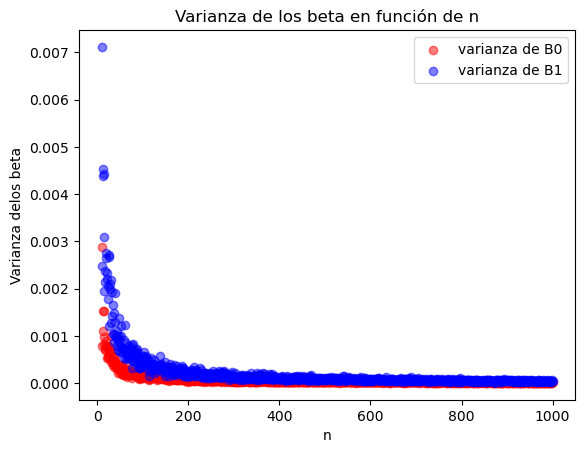

In [181]:
mean_values = []
variance_values = []

for n in range(10,1001):
    beta0 = []
    beta1 = []

    for i in range(30):
        beta_0, beta_1 = sampleado(n)
        beta0.append(beta_0)
        beta1.append(beta_1)

    mean_values.append((np.mean(beta0),np.mean(beta1)))
    variance_values.append((np.var(beta0),np.var(beta1)))


plt.scatter(range(10,1001), [t[0] for t in mean_values], color = "r", label='Media de B0')
plt.scatter(range(10,1001), [t[1] for t in mean_values], color = "b", label='Media de B1')
plt.xlabel('n')
plt.ylabel('media')
plt.title('Media de los beta en función de n')
plt.legend()
plt.show()

# Graficar la varianza de los residuos en función de n
plt.scatter(range(10,1001), [t[0] for t in variance_values], color = "r", label='varianza de B0', alpha=0.5)
plt.scatter(range(10,1001), [t[1] for t in variance_values], color = "b", label='varianza de B1', alpha = 0.5)
plt.xlabel('n')
plt.ylabel('Varianza delos beta')
plt.title('Varianza de los beta en función de n')
plt.legend()
plt.show()    

4. En este ejercicio, utilizaremos el dataset de automóviles disponible en el siguiente enlace:
https://archive.ics.uci.edu/static/public/9/auto+mpg.zip. Este conjunto de datos contiene información sobre varios atributos de automóviles, incluyendo Millas por galón de combustible (MPG)
y Caballos de Fuerza (HP).

(a) Ajustar un modelo lineal que relacione MPG con HP utilizando todos los puntos del dataset.
Calcular el 𝑅
2 para este modelo.

(i) Ajustar logaritmo de MPG vs HP y calcular 𝑅
2
.

(ii) Ajustar logaritmo de MPG vs logaritmo HP y calcular 𝑅
2
.

In [70]:
path = r"C:/Users/Usuario/Estadistica/Estadistica-Inferencia/res/auto-mpg.data-original"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
df = pd.read_csv(path, names=column_names, delim_whitespace=True)
df.dropna(inplace=True)


In [69]:
X = df["Horsepower"].values.reshape(-1, 1)
Y = df["MPG"]

model = LinearRegression()
model.fit(X,Y)

r2 = model.score(X, Y)
print(r2)

0.6059482578894348


In [72]:
# ajustar log MPG vs HP y calculo r2
log_y = np.log(Y)
model_log_mpg = LinearRegression()
model_log_mpg.fit(X, log_y)
r2_log_mpg = model_log_mpg.score(X, log_y)
print(r2_log_mpg)


0.6891575108068901


In [74]:
# ajustar log MPG vs log HP y calculo r2
log_X = np.log(X)
log_y = np.log(Y)
model_log_mpg = LinearRegression()
model_log_mpg.fit(log_X, log_y)
r2_log_mpg = model_log_mpg.score(log_X, log_y)
print(r2_log_mpg)

0.722696751235987


(b) Veamos qué pasa si no usamos todo el dataset sino sólo un porcentaje.

(i) Ajustar un modelo lineal a MPG vs HP, pero esta vez utilizando solo el 80% de los puntos
del dataset seleccionados al azar. ¿Cuánto vale 𝑅
2
? ¿Y sobre el 20% restante de los
puntos?

(ii) Repetir el punto anterior para diferentes porcentajes de datos de entrenamiento.

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

mod = LinearRegression()
mod.fit(X_train, y_train)

r2 = mod.score(X_test, y_test)
print(r2)

0.5659681822256184


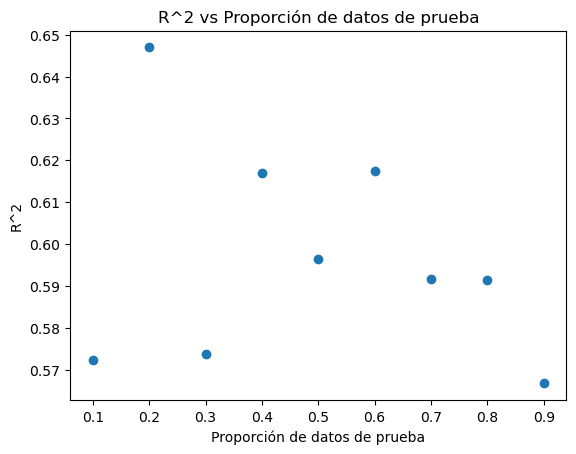

In [94]:
test_size = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
r2 = []
for n in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=n)

    mod = LinearRegression()
    mod.fit(X_train, y_train)

    s = mod.score(X_test, y_test)

    r2.append(s)


plt.scatter(test_size, r2)
plt.xlabel('Proporción de datos de prueba')
plt.ylabel('R^2')
plt.title('R^2 vs Proporción de datos de prueba')
plt.show()
    

(c) Utilizando el dataset completo, realizar ajustes lineales para relacionar MPG con cada una
de las variables. Ordenar las variables de acuerdo al 𝑅
2 obtenido de la más importante a la
menos importante.

In [100]:
variables = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

Y = df["MPG"]

acc = []

for var in variables:
    X = df[var].values.reshape(-1, 1)
    
    mod = LinearRegression()
    mod.fit(X,Y)

    r2 = mod.score(X,Y)
    acc.append((var,r2))

sorted_acc = sorted(acc, key=lambda x: x[1])

print("Variables ordenadas por R^2:")
for var, r2 in sorted_acc:
    print(f"{var}: {r2}")

Variables ordenadas por R^2:
Acceleration: 0.1792070501562546
Origin: 0.3194609386689675
Model Year: 0.33702781330962295
Cylinders: 0.6046889889441246
Horsepower: 0.6059482578894348
Displacement: 0.6482294003193044
Weight: 0.6926304331206254


5
(a) Ajustar una regresión lineal múltiple de MPG en función de todas las otras variables. Hacer
los gráficos pertinentes para analizar el comportamiento del modelo, hacer los siguientes
gráficos:

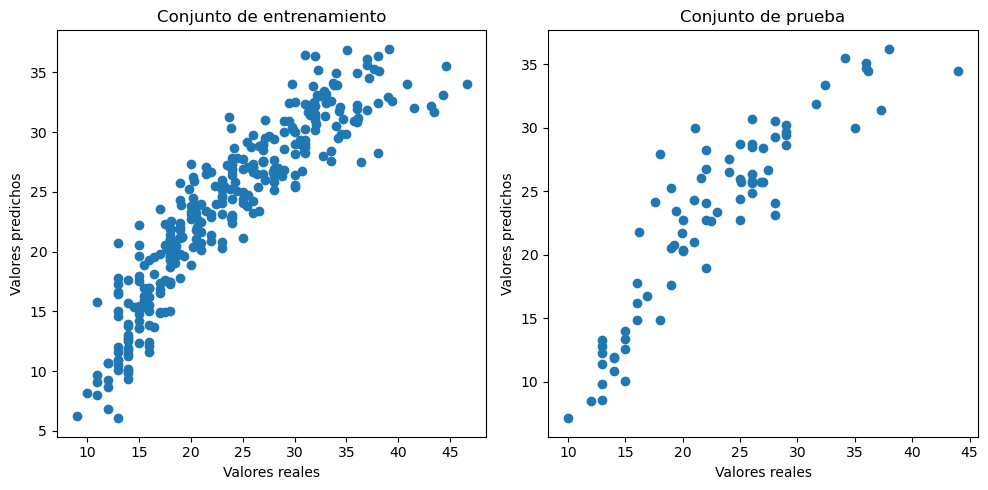

In [108]:
X = df.drop(["MPG", "Car Name"], axis = 1)
y = df["MPG"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mod = LinearRegression()
mod.fit(X_train,y_train)

y_pred_train = mod.predict(X_train)
y_pred_test = mod.predict(X_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Conjunto de entrenamiento")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Conjunto de prueba")

plt.tight_layout()
plt.show()

(b) Hacer forward selection para seleccionar el mejor modelo de regresión según el estadístico de
Mallow. Este proceso consiste en agregar una variable a la vez al modelo inicial y comparar
el valor del estadístico de Mallow para cada modelo, eligiendo el del valor más bajo.

In [164]:
variables = ['Horsepower','Weight','Displacement','Cylinders',  'Acceleration', 'Model Year', 'Origin']

variables_best_actual = []
mallow_best_actual = 10000000000000000

y = df["MPG"]
#check
for v in sorted_acc:
    X = pd.concat([df[v], df[variables_best_actual]], axis=1)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    rss = sum((y-y_pred)**2)

    mallow = (rss + (2 * (len(variables_best_actual) + 1) * np.var(y-y_pred) ) ) / len(y) 

    if mallow < mallow_best_actual:
        variables_best_actual.append(v)
        mallow_best_actual = mallow
        variables.remove(v)

print(variables_best_actual)
print(mallow_best_actual)

KeyError: ('Acceleration', 0.1792070501562546)

(c) Realizar la regresión con todas las variables, pero con regularización de Ridge y de Lasso.
Dividir el dataset en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
para elegir el mejor valor de 𝜆 para cada uno.


In [124]:
from sklearn.linear_model import Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = [0.1, 0.5, 1.0, 5.0, 10.0]


# Regularización con Ridge
best_ridge_alpha = None
best_ridge_score = -np.inf
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    score = ridge_model.score(X_test, y_test)
    if score > best_ridge_score:
        best_ridge_score = score
        best_ridge_alpha = alpha

print("Mejor valor de alpha para Ridge:", best_ridge_alpha)
print("R^2 en el conjunto de prueba para Ridge:", best_ridge_score)

# Regularización con Lasso
best_lasso_alpha = None
best_lasso_score = -np.inf
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    score = lasso_model.score(X_test, y_test)
    if score > best_lasso_score:
        best_lasso_score = score
        best_lasso_alpha = alpha

print("Mejor valor de alpha para Lasso:", best_lasso_alpha)
print("R^2 en el conjunto de prueba para Lasso:", best_lasso_score)


Mejor valor de alpha para Ridge: 10.0
R^2 en el conjunto de prueba para Ridge: 0.7915211170468788
Mejor valor de alpha para Lasso: 0.5
R^2 en el conjunto de prueba para Lasso: 0.7933018260498219


In [149]:
import numpy as np

def ridge_regression_coef(X, y, alpha):
    # Agrega una columna de unos para el término de sesgo (intercept)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calcula los coeficientes usando la fórmula cerrada de Ridge regression
    XtX = np.dot(X.T, X)
    XtX += alpha * np.eye(XtX.shape[0])  # Agrega alpha a la diagonal principal
    XtX_inv = np.linalg.inv(XtX)
    XtY = np.dot(X.T, y)
    coef = np.dot(XtX_inv, XtY)
    
    return coef[1:]  # Ignora el coeficiente correspondiente al término de sesgo

# Ejemplo de uso
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 4, 5])

alphas = [0.1, 0.5, 1.0, 5.0, 10.0]

for alpha in alphas:
    print(alpha)
    coeficientes = ridge_regression_coef(X_train, y_train, alpha)
    print("Coeficientes de regresión de Ridge:", coeficientes)


0.1
Coeficientes de regresión de Ridge: [-0.38645837 -0.02614061  0.01543274  0.00514377  1.58498446 -0.00604863
  0.73034374]
0.5
Coeficientes de regresión de Ridge: [-0.4555162  -0.03454431  0.01594944 -0.05202328  1.53228643 -0.00588742
  0.66503558]
1.0
Coeficientes de regresión de Ridge: [-0.48305481 -0.03816836  0.01610644 -0.07695121  1.50490221 -0.00581833
  0.63635957]
5.0
Coeficientes de regresión de Ridge: [-0.49248857 -0.04228662  0.0156339  -0.10801979  1.42705073 -0.00574406
  0.59862416]
10.0
Coeficientes de regresión de Ridge: [-0.46338843 -0.04218509  0.01476515 -0.111007    1.36431591 -0.00575155
  0.59240466]


In [127]:
def ridge_loss(X, y, weights, alpha):
    # Calcula la función de pérdida para Ridge
    y_pred = np.dot(X, weights)
    loss = np.mean((y - y_pred) ** 2) + alpha * np.sum(weights ** 2)
    return loss

def ridge_gradient(X, y, weights, alpha):
    # Calcula el gradiente de la función de pérdida para Ridge
    y_pred = np.dot(X, weights)
    gradient = -2 * np.dot(X.T, (y - y_pred)) / len(y) + 2 * alpha * weights
    return gradient

weights = np.zeros(X_train.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define los alphas a probar
alphas = [0.1, 0.5, 1.0, 5.0, 10.0]

# Regularización con Ridge
best_ridge_alpha = None
best_ridge_score = -np.inf

for alpha in alphas:
    weights = np.zeros(X_train.shape[1])
    for _ in range(100):  # Número de iteraciones de descenso de gradiente
        # Calcula el gradiente y actualiza los pesos
        gradient = ridge_gradient(X_train, y_train, weights, alpha)
        weights -= 0.01 * gradient  # Tasa de aprendizaje
    score = 1 - ridge_loss(X_test, y_test, weights, alpha) / np.var(y_test)  # R^2 score
    if score > best_ridge_score:
        best_ridge_score = score
        best_ridge_alpha = alpha

print("Mejor valor de alpha para Ridge:", best_ridge_alpha)
print("R^2 en el conjunto de prueba para Ridge:", best_ridge_score)

Mejor valor de alpha para Ridge: None
R^2 en el conjunto de prueba para Ridge: -inf


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19944\2106550110.py:29: RuntimeWarning: invalid value encountered in subtract
  weights -= 0.01 * gradient  # Tasa de aprendizaje


In [126]:
def lasso_loss(X, y, weights, alpha):
    # Calcula la función de pérdida para Lasso
    y_pred = np.dot(X, weights)
    loss = np.mean((y - y_pred) ** 2) + alpha * np.sum(np.abs(weights))
    return loss

def lasso_gradient(X, y, weights, alpha):
    # Calcula el gradiente de la función de pérdida para Lasso
    y_pred = np.dot(X, weights)
    gradient = -2 * np.dot(X.T, (y - y_pred)) / len(y) + alpha * np.sign(weights)
    return gradient

weights = np.zeros(X_train.shape[1])

# Define los alphas a probar
alphas = [0.1, 0.5, 1.0, 5.0, 10.0]

best_lasso_alpha = None
best_lasso_score = -np.inf
for alpha in alphas:
    for _ in range(100):  # Número de iteraciones de descenso de gradiente
        # Calcula el gradiente y actualiza los pesos
        gradient = lasso_gradient(X_train, y_train, weights, alpha)
        weights -= 0.01 * gradient  # Tasa de aprendizaje
    score = 1 - lasso_loss(X_test, y_test, weights, alpha) / np.var(y_test)  # R^2 score
    if score > best_lasso_score:
        best_lasso_score = score
        best_lasso_alpha = alpha

print("Mejor valor de alpha para Lasso:", best_lasso_alpha)
print("R^2 en el conjunto de prueba para Lasso:", best_lasso_score)

Mejor valor de alpha para Lasso: None
R^2 en el conjunto de prueba para Lasso: -inf


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19944\3252391876.py:24: RuntimeWarning: invalid value encountered in subtract
  weights -= 0.01 * gradient  # Tasa de aprendizaje


6. Generar 𝑛 = 100 samples de 𝑋1 ∼ U (0, 1), de 𝑍 ∼ N (0, 0.1) y de 𝜀 ∼ N (0, 1); a partir de ellas
generar 𝑛 samples de 𝑋2 = 0.5𝑋1 + 𝑍 y de
𝑌 = 2 + 2𝑋1 + 0.3𝑋2 + 𝜀.

In [150]:
n = 100

X1 = np.random.uniform(0,1,n)
Z = np.random.normal(0,np.sqrt(0.1),n)
epsilon = np.random.normal(0,1,n)

X2 = (X1/2) + Z
Y = 2 + 2*X1 + 0.3*X2 + epsilon

(a) Calcular la correlación entre las muestras de 𝑋1 y 𝑋2, y graficar su distribución conjunta.

Correlación entre X1 y X2: 0.370324719211226


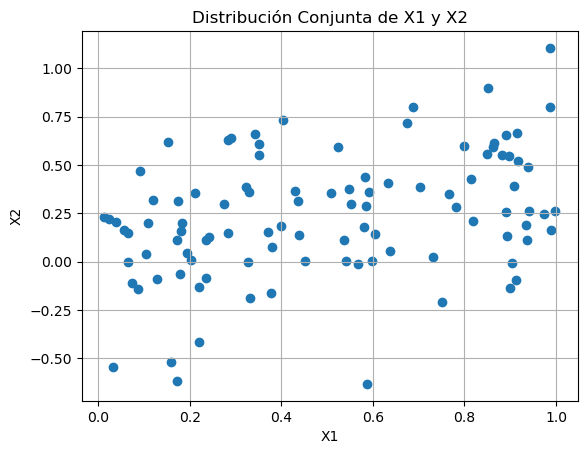

In [151]:
correlation = np.corrcoef(X1, X2)[0, 1]
print("Correlación entre X1 y X2:", correlation)

# Graficar distribución conjunta
plt.scatter(X1, X2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Distribución Conjunta de X1 y X2')
plt.grid(True)
plt.show()

Text(37.597222222222214, 0.5, 'X2')

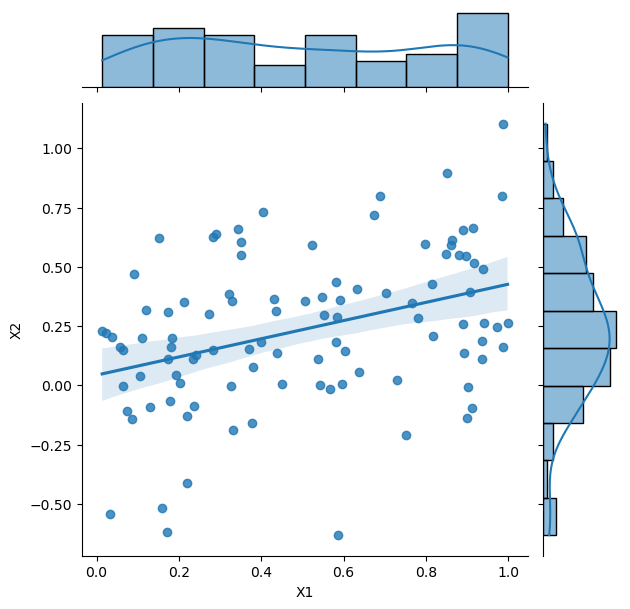

In [154]:
import seaborn as sns

def cov(X,Y):
  assert len(X) == len (Y)
  return (1/(len(X)-1))*((X-X.mean())*(Y-Y.mean())).sum()

def corr(X, Y):
  return cov(X,Y)/(cov(X,X)*cov(Y,Y))**0.5

corr(X1,X2)
sns.jointplot(x=X1, y=X2, kind="reg")
plt.xlabel("X1")
plt.ylabel("X2")

(b) Ajusta un modelo de regresión lineal por mínimos cuadrados para predecir𝑌 utilizando tanto
𝑋1 como 𝑋2. Describir los resultados obtenidos, incluyendo los coeficientes de regresión ˆ𝛽0,
ˆ𝛽1 y
ˆ𝛽2, y analizar la relación entre estos coeficientes y los verdaderos 𝛽0, 𝛽1 y 𝛽2.

In [159]:
X = np.column_stack((np.ones(len(X1)), X1, X2))

B_hat = np.linalg.inv(X.T@X)@X.T@Y

print(f"aprox coeffs{B_hat}")
print(f"real coeffs{[2, 2, .3]}")

[1.98050633 2.18081746 0.0754469 ]
aprox coeffs[1.98050633 2.18081746 0.0754469 ]
real coeffs[2, 2, 0.3]


In [157]:
X = np.column_stack((X1, X2))

# Ajustar modelo
model = LinearRegression().fit(X, Y)

# Coeficientes de regresión
beta0 = model.intercept_
beta1, beta2 = model.coef_
print("Coeficientes de regresión:")
print("Beta0 estimado:", beta0 , "beta0 real:", 2)
print("Beta1 estimado:", beta1, "beta1 real: 2")
print("Beta2estimado:", beta2, "beta2 real: 0.3")

Coeficientes de regresión:
Beta0 estimado: 1.9805063296938512 beta0 real: 2
Beta1 estimado: 2.1808174621344243 beta1 real: 2
Beta2estimado: 0.07544690157481349 beta2 real: 0.3


(c) Ajustar un modelo de regresión lineal por mínimos cuadrados para 𝑌 y analizar resultados

(i) utilizando solo las muestras de 𝑋1;

(ii) utilizando solo las muestras de 𝑋2.


In [160]:
#i) modelo Y~x1

X = np.column_stack((np.ones(len(X1)), X1))

B_hat = np.linalg.inv(X.T@X)@X.T@Y


print(f"aprox coeffs{B_hat}")
print(f"real coeffs{[2, 2]}")

#ii) modelo Y~x2

X = np.column_stack((np.ones(len(X1)), X2))

B_hat = np.linalg.inv(X.T@X)@X.T@Y


print(f"aprox coeffs{B_hat}")
print(f"real coeffs{[2, .3]}")

aprox coeffs[1.98378166 2.20975125]
real coeffs[2, 2]
aprox coeffs[2.88811805 0.85531432]
real coeffs[2, 0.3]


In [162]:
model_X1 = LinearRegression().fit(X1.reshape(-1, 1), Y)
beta0_X1 = model_X1.intercept_
beta1_X1 = model_X1.coef_[0]
print("Modelo con solo X1:")
print("Beta0:", beta0_X1)
print("Beta1:", beta1_X1)

model_X2 = LinearRegression().fit(X2.reshape(-1, 1), Y)
beta0_X2 = model_X2.intercept_
beta1_X2 = model_X2.coef_[0]
print("Modelo con solo X2:")
print("Beta0:", beta0_X2)
print("Beta1:", beta1_X2)

Modelo con solo X1:
Beta0: 1.9837816557229333
Beta1: 2.2097512539156194
Modelo con solo X2:
Beta0: 2.8881180453127144
Beta1: 0.8553143218552732


(d) Graficar la distribución conjunta de ˆ𝛽1 y
ˆ𝛽2.

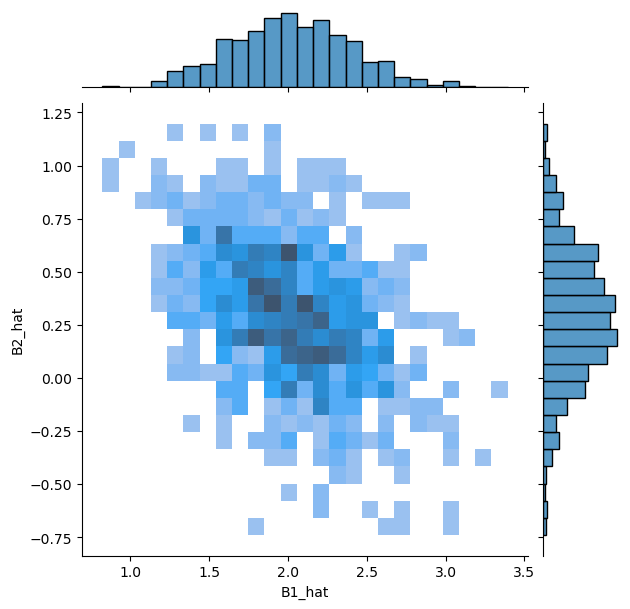

In [163]:
N_exp = 1000
results = np.zeros((N_exp,3))

for i in range(N_exp):
  n = 100

  X1 = st.uniform(0,1).rvs(n)
  Z = st.norm(0,0.1**0.5).rvs(n)
  e = st.norm().rvs(n)

  X2 = 0.5*X1+Z
  Y = 2 + 2*X1 + 0.3*X2 + e

  X = np.column_stack((np.ones(len(X1)), X1, X2))
  B_hat = np.linalg.inv(X.T@X)@X.T@Y
  results[i] = B_hat

sns.jointplot(x=results.T[1], y=results.T[2], kind="hist")
plt.xlabel("B1_hat")
plt.ylabel("B2_hat")
plt.show()